# 1,2,3 Classification
In this tutorial, I'll go throgh some implementations details you maybe use in your final project:
1. how to load the dataset
2. how to use pre-processing
3. how to train the model
4. how to save and load your well-trained model
5. how to test your performance
6. how to obtain predictions from a few images
7. how to visual your results

<strong>Before starting this tutorial, TA will assume your folder strucutre will be arranged like this:</strong><br/>
Tutorial.ipynb<br/>
-123<br/>
&emsp;-train<br/>
&emsp;&emsp;-one<br/>
&emsp;&emsp;&emsp;4365.jpg<br/>
&emsp;&emsp;&emsp;4378.jpg<br/>
&emsp;&emsp;&emsp;...<br/>
&emsp;&emsp;-two<br/>
&emsp;&emsp;&emsp;4972.jpg<br/>
&emsp;&emsp;&emsp;4979.jpg<br/>
&emsp;&emsp;&emsp;...<br/>
&emsp;&emsp;-three<br/>
&emsp;&emsp;&emsp;...<br/>
&emsp;-val<br/>
&emsp;&emsp;-one<br/>
&emsp;&emsp;&emsp;2.jpg<br/>
&emsp;&emsp;&emsp;5.jpg<br/>
&emsp;&emsp;&emsp;...<br/>
&emsp;&emsp;-two<br/>
&emsp;&emsp;&emsp;1.jpg<br/>
&emsp;&emsp;&emsp;35.jpg<br/>
&emsp;&emsp;&emsp;...<br/>
&emsp;&emsp;-three<br/>
&emsp;&emsp;&emsp;...<br/>
&emsp;-test<br/>
&emsp;&emsp;306.jpg<br/>
&emsp;&emsp;357.jpg<br/>

In [2]:
# import some libraries you maybe use
import torchvision # an useful library to help I/O (highly recommend). To install this, just do "pip install torchvision"
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [3]:
import os
root = "database/train01"
if not os.path.isdir(root):
    os.mkdir(root)
for i in os.listdir("database/train"):
    outputfilename = os.path.join(root,i)
    if not os.path.isdir(outputfilename):
        os.mkdir(outputfilename)

In [4]:
import os
root = "database/val01"
if not os.path.isdir(root):
    os.mkdir(root)
for i in os.listdir("database/val"):
    outputfilename = os.path.join(root, i)
    if not os.path.isdir(outputfilename):
        os.mkdir(outputfilename)

In [5]:
import os
root = "database/test01"
if not os.path.isdir(root):
    os.mkdir(root)

In [6]:
import os
import imageio
from scipy import signal
for i in os.listdir("database/train"):
    name = os.path.join("database/train",i)
    for j in os.listdir(name):  
        x = np.load(os.path.join(name,j))
        f, t, Sxx = signal.spectrogram(x, fs=1.0, window=('hamming'), nperseg=256, noverlap=128, nfft=256, mode='magnitude')
        
        filename, fileextension = os.path.splitext(j)
        tmpj = filename+".jpg"
        tmpname = os.path.join("database/train01", i)
        tmppos  = os.path.join(tmpname, tmpj)
        imageio.imwrite(tmppos, Sxx)

Lossy conversion from float32 to uint8. Range [2.6805460038303863e-06, 2.2947638034820557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8830679664461059e-06, 1.0634366273880005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.474773388414178e-06, 1.764168620109558]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5600916185576352e-06, 2.128835439682007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7442123407818144e-06, 2.2153866291046143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.961934458449832e-06, 2.398623466491699]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.59554826950625

Lossy conversion from float32 to uint8. Range [1.3296235010784585e-06, 2.0804874897003174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.9508038248168305e-06, 1.4737643003463745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.702161737033748e-06, 2.286999225616455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.2419663916225545e-06, 1.3324991464614868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.4727394247747725e-06, 1.3484798669815063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.9994762371643446e-06, 2.2605767250061035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.95471892286

Lossy conversion from float32 to uint8. Range [4.579768301482545e-06, 2.1074209213256836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.3092851481342223e-06, 1.9540510177612305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.52649146609474e-06, 2.425126552581787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.948809424196952e-06, 1.8424198627471924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.34077413349587e-06, 2.2075090408325195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.673060172739497e-07, 2.2289156913757324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.448965450545074e-

Lossy conversion from float32 to uint8. Range [5.1499605433491524e-06, 1.5753225088119507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.021834219107404e-06, 2.406585693359375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.107994871243136e-06, 2.0583980083465576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.981975052942289e-06, 2.5803425312042236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.75057261598522e-08, 1.2652839422225952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.642365183826769e-06, 2.0666816234588623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4983872865268495

Lossy conversion from float32 to uint8. Range [2.2692240690957988e-06, 1.9254359006881714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5125081063160906e-06, 2.430432081222534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.202430661986e-06, 2.04722261428833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.4675221033685375e-06, 2.300548791885376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.829012818343472e-06, 2.1618599891662598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2055253364451346e-06, 2.1595213413238525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.2023474432207877e-

Lossy conversion from float32 to uint8. Range [3.945864591514692e-06, 1.5340179204940796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0849616046471056e-05, 1.990896463394165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.760278843856213e-07, 2.175987482070923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.327013473608531e-06, 2.0069122314453125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4644514294559485e-06, 2.468782424926758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0889863208140014e-06, 1.718462586402893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.627620678045787e

Lossy conversion from float32 to uint8. Range [1.5644568520656321e-06, 2.23283314704895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.2833975132671185e-06, 1.9220144748687744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0189381100644823e-05, 2.1160948276519775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9264766706328373e-06, 2.4918930530548096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.018570674204966e-05, 1.9441801309585571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4182650431848742e-07, 2.025113344192505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.1458155187210

Lossy conversion from float32 to uint8. Range [6.116268195910379e-06, 2.4034955501556396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4865684028773103e-07, 2.077103614807129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.494472017948283e-06, 2.4748992919921875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9752296793740243e-06, 1.6202207803726196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.260830792190973e-06, 2.3771779537200928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.891020104949348e-07, 1.9214248657226562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.88380556412448

Lossy conversion from float32 to uint8. Range [4.36411983173457e-06, 1.9665197134017944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.136606435167778e-07, 1.829511284828186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4834117791906465e-06, 1.6654150485992432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.273212870335556e-07, 2.480221748352051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.891020104949348e-07, 2.1987087726593018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.281387646187795e-06, 2.2397985458374023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.8660772386501776e

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [9.103144975597388e-07, 1.1271185874938965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.3046807200444164e-06, 1.0318260192871094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5850671388761839e-06, 1.0266777276992798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9304206944070756e-06, 1.0177116394042969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7831728200690122e-06, 1.1228011846542358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.5894302072847495e-06, 1.0954890251159668]. Conve

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.354910975554958e-06, 1.0590875148773193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.6051857275888324e-06, 1.1520675420761108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3875022659703973e-06, 1.0298421382904053]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conv

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.629699793033069e-06, 1.0035269260406494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4689612675720127e-06, 1.072420597076416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving 

Lossy conversion from float32 to uint8. Range [7.638699571543839e-06, 1.7889440059661865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.537180641113082e-06, 1.4848240613937378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.4149676391971298e-06, 1.9711705446243286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.5699179029033985e-06, 1.5614262819290161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.869836629950441e-06, 1.747761607170105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0959460016456433e-06, 1.4519872665405273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.7511880438833

Lossy conversion from float32 to uint8. Range [4.096868451597402e-06, 1.1912789344787598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.469331649190281e-06, 1.499926209449768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.188827460893663e-06, 1.1446616649627686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.466123760314076e-06, 1.7108052968978882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.303897978592431e-06, 1.3736532926559448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.288641882041702e-06, 1.953248143196106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7055782564057154e

Lossy conversion from float32 to uint8. Range [5.330312887963373e-06, 1.7855147123336792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6250953649432631e-06, 1.7148621082305908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.763006927532842e-06, 1.6126244068145752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4303729989915155e-06, 1.5557581186294556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion 

Lossy conversion from float32 to uint8. Range [2.8309957542660413e-06, 1.5092902183532715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.5918550313217565e-06, 1.5936697721481323]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.386797165054304e-07, 1.6947367191314697]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.9718300993408775e-06, 1.6023319959640503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5029932001198176e-06, 1.8227789402008057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.36054153094301e-06, 1.6316957473754883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.003690269702

Lossy conversion from float32 to uint8. Range [3.328561206217273e-06, 1.6161394119262695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.225976666319184e-05, 1.8067046403884888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.57998112324276e-06, 1.3874921798706055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.152252123887592e-07, 1.668703317642212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.13138649391476e-06, 1.5216097831726074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.758376695055631e-06, 1.757534384727478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.3140620366320945e-0

Lossy conversion from float32 to uint8. Range [7.493167231586995e-06, 1.6472991704940796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.813322776608402e-07, 1.6553895473480225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2705290828307625e-06, 1.3895081281661987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.5638911413116148e-06, 1.7557373046875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.914657786983298e-06, 1.5108094215393066]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.5630925999139436e-06, 1.6504452228546143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.049201611953322

Lossy conversion from float32 to uint8. Range [4.284132046450395e-06, 1.2335437536239624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.0932390018278966e-06, 1.9364163875579834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7403821175321355e-06, 1.318212866783142]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.082116558696725e-07, 1.3866140842437744]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.3618544977071e-07, 1.2183270454406738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8319257151233614e-06, 1.4628403186798096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.345595011225669

Lossy conversion from float32 to uint8. Range [5.424863957159687e-06, 1.5454697608947754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.3801984500314575e-06, 1.335225224494934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.3652002002781956e-06, 1.4495296478271484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.48901528721035e-07, 1.58856201171875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.1817627384734806e-06, 1.0652741193771362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.933668267563917e-06, 1.5760204792022705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.159585276080179e

Lossy conversion from float32 to uint8. Range [7.74136367454048e-07, 1.631522536277771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.040698852099013e-06, 1.8197835683822632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9223850813432364e-06, 1.7581844329833984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.3138898035977036e-06, 1.743362545967102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.65797109225241e-06, 1.517539381980896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0636988463375019e-06, 1.5321599245071411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.521922957996139e-

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [3.03207434626529e-06, 1.6304739713668823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.845738885705941e-07, 1.8256601095199585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.287642008828698e-06, 1.938693881034851]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.554871336244105e-07, 1.6500309705734253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6320262830049614e-06, 1.5994759798049927]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1464309181974386e-06, 1.6810684204101562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.302070919948164

Lossy conversion from float32 to uint8. Range [6.3932552620826755e-06, 1.5974255800247192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.465811222573393e-07, 1.875425934791565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.977473857550649e-06, 1.5951974391937256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.218722993864503e-07, 1.6651073694229126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.110342044645222e-06, 1.4804668426513672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.94029018227593e-06, 1.580178141593933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.603587967721978e-

Lossy conversion from float32 to uint8. Range [3.677982249428169e-06, 1.8147627115249634]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.6113722217123723e-06, 1.16795015335083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.1904434106545523e-06, 1.6819878816604614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.4144217150023906e-06, 1.6331202983856201]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.495860245398944e-06, 1.762924075126648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.914042387506925e-07, 1.3495663404464722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.432078242189163

Lossy conversion from float32 to uint8. Range [3.1201832371152705e-06, 1.7494444847106934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.466667410772061e-06, 1.5881255865097046]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9855710888805334e-06, 1.6868000030517578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5364538512585568e-06, 1.9300227165222168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.0053786304051755e-06, 1.4954732656478882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2705290828307625e-06, 1.3846426010131836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2284419881

Lossy conversion from float32 to uint8. Range [5.215620603848947e-06, 1.6768370866775513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7636706363409758e-06, 1.5441330671310425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.08769552045851e-06, 1.3518245220184326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.8909896627737908e-06, 1.7067352533340454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9855710888805334e-06, 1.5323947668075562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.681500973267248e-06, 1.6152706146240234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8893115338869

Lossy conversion from float32 to uint8. Range [1.7728312968756654e-06, 1.8460254669189453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.673060172739497e-07, 1.8719321489334106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0575234909993014e-06, 1.866118311882019]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.2730249586165883e-06, 1.7695225477218628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.372983767098049e-06, 1.3704954385757446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.770831765199546e-06, 1.7619231939315796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.4911726604368

Lossy conversion from float32 to uint8. Range [1.7728313039810928e-08, 2.0404810905456543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.2455863302184298e-07, 1.853946566581726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.021027739829151e-06, 1.7051925659179688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.3138898035977036e-06, 1.8296544551849365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.278433152649086e-06, 1.628692388534546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.7421807468927e-06, 1.6120814085006714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5891082512098365

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.285870777996024e-06, 2.0062382221221924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.123718892718898e-06, 1.5813014507293701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7255558759643463e-06, 1.8164904117584229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0223327535641147e-06, 1.593311071395874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5128160839594784e-06, 1.9798043966293335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to sup

Lossy conversion from float32 to uint8. Range [4.632898708223365e-06, 1.6399016380310059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.718341420404613e-06, 1.5843669176101685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.720335593650816e-06, 1.611022710800171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.885877168206207e-06, 1.6823738813400269]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7445262276160065e-06, 1.6446664333343506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.790492999338312e-06, 1.4589424133300781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.878068639551202

Lossy conversion from float32 to uint8. Range [3.915002650956012e-07, 2.496910333633423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.134321435842139e-07, 1.3741531372070312]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4767274428304518e-06, 2.514995813369751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7609295355214272e-06, 2.3137271404266357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.599457952281227e-06, 2.6292121410369873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1915935829165392e-06, 1.9190586805343628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.39964868139941

Lossy conversion from float32 to uint8. Range [2.0446655071282294e-06, 2.2916319370269775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5021947749337414e-06, 2.7785298824310303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4948675420309883e-06, 2.625218629837036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8074259742206777e-06, 2.254163980484009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.497556223119318e-07, 3.159402847290039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.361799710750347e-06, 1.7780265808105469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.42862938648613

Lossy conversion from float32 to uint8. Range [1.3256700412966893e-06, 2.5948071479797363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.4332109660463175e-06, 2.3776698112487793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.176331463488168e-06, 2.5904104709625244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.136531065843883e-06, 2.789365768432617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.939959929586621e-06, 2.4828996658325195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5227882386170677e-06, 2.553154468536377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.35968786405283

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5292392820119858e-06, 3.2817013263702393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0683032744273078e-06, 2.8159422874450684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.3472523480450036e-06, 3.3244106769561768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7004407482090755e-06, 1.7264156341552734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2321178246565978e-06, 3.5783886909484863]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.7604570479743415e-07, 2.505866050720215]. Conve

Lossy conversion from float32 to uint8. Range [5.950156264589168e-06, 3.354095935821533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4286066516433493e-06, 1.8879358768463135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.6252678253513295e-06, 3.4986369609832764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.655355602764757e-07, 3.544205665588379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.880966116616037e-06, 2.9630298614501953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.847946572932415e-06, 3.015125274658203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.3859354314481607

Lossy conversion from float32 to uint8. Range [1.978184400286409e-06, 2.3490817546844482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.07360073243035e-06, 2.098123550415039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0880747797491495e-06, 2.0040442943573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.557192312404368e-07, 1.7901309728622437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7863245602711686e-06, 2.1952457427978516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.9602817903651157e-06, 1.7300961017608643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0495640455919784e

Lossy conversion from float32 to uint8. Range [4.2547953853500076e-06, 1.3990345001220703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.0766011605010135e-06, 2.4783806800842285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.3637751667138218e-07, 2.9999265670776367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1139289881612058e-06, 2.0243148803710938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2354719274298986e-06, 2.2946572303771973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.582106046451372e-06, 2.964010000228882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.54566282112

Lossy conversion from float32 to uint8. Range [3.988870389548538e-08, 3.4415667057037354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.354910975554958e-06, 1.0998302698135376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6556356285946094e-06, 3.3560426235198975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.224336921903159e-07, 2.3385510444641113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5690683287393767e-06, 3.537602424621582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.487338522565551e-06, 2.881263494491577]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.190685108871548

Lossy conversion from float32 to uint8. Range [3.6423728033696534e-06, 2.1402671337127686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.929432184828329e-06, 2.432776689529419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9972189875261392e-06, 2.1077284812927246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.3789262943173526e-06, 2.813838005065918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7521483641758095e-06, 1.9592342376708984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7872747523360886e-06, 2.75072979927063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.53569646954565

Lossy conversion from float32 to uint8. Range [1.983679567274521e-06, 2.8863797187805176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3222173720350838e-06, 2.4750633239746094]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9382955542823765e-06, 3.1155014038085938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5257429595294525e-06, 2.9748713970184326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.64925005871919e-06, 2.1823549270629883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9205672288080677e-06, 3.3379743099212646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.731465317789

Lossy conversion from float32 to uint8. Range [6.383670097420691e-06, 3.3892555236816406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5672845822555246e-06, 2.931218385696411]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.423776206545881e-06, 1.5718919038772583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.3928830564254895e-06, 2.693819522857666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3782135965811904e-06, 1.9388753175735474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1079995374529972e-06, 3.481812000274658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.74618992332398

Lossy conversion from float32 to uint8. Range [2.0869822492386447e-06, 3.4364848136901855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.341493200219702e-06, 1.7723337411880493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.3091217826731736e-06, 3.136401891708374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5600916185576352e-06, 1.7454689741134644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7669218550508958e-06, 2.329796314239502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.03271838472574e-06, 3.2624785900115967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.64956803070526

Lossy conversion from float32 to uint8. Range [2.5402791834494565e-06, 2.841543674468994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1818875833569109e-07, 3.481478452682495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.005146143346792e-06, 3.1535210609436035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.632509565752116e-06, 3.2233834266662598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.5773998610675335e-06, 2.540339946746826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.0101900822264724e-07, 3.215069532394409]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.602985093995812

Lossy conversion from float32 to uint8. Range [5.281560220282699e-07, 2.7382009029388428]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8437445987729006e-06, 2.6776010990142822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.5811192446999485e-06, 2.8803927898406982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.830685619097494e-06, 2.385126829147339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0744098492286867e-06, 3.059530735015869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.96296774296934e-07, 2.602342128753662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.045001676582615e

Lossy conversion from float32 to uint8. Range [2.34530812548428e-08, 2.57045316696167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.5513335205905605e-06, 2.264490842819214]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5188978725054767e-06, 2.6425485610961914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.308036750444444e-06, 2.228245496749878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.68016310656094e-06, 3.3100197315216064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.887449671921786e-06, 2.29255747795105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.3711619689947838e-07,

Lossy conversion from float32 to uint8. Range [2.0344996300991625e-06, 1.8732168674468994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.798375589918578e-06, 2.463252067565918]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.962448656442575e-06, 2.388939380645752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.478141934465384e-06, 1.8184750080108643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.578790144980303e-06, 4.057577610015869]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.882672783423914e-06, 1.4834041595458984]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6621937675154186e

Lossy conversion from float32 to uint8. Range [8.760741820879048e-07, 2.7599048614501953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.1377964003477246e-06, 3.661296844482422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.345389457848796e-07, 3.0433380603790283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2924125485369586e-06, 4.241594314575195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.013487801377778e-06, 2.4981164932250977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.936818307513022e-06, 3.2027409076690674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.277817412112199

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.914047480042427e-08, 3.900798797607422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.0516158605896635e-07, 2.4211246967315674]. Convert image to uint8 prior to saving 

Lossy conversion from float32 to uint8. Range [1.4891783166604e-06, 1.4078161716461182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2114347782699042e-06, 1.55495285987854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5346782333836018e-07, 1.5061291456222534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5161762121351785e-06, 1.451988935470581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0400610790384235e-06, 1.4221090078353882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.679757701822382e-06, 1.3885143995285034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.357603537144314e

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4330386477467982e-07, 2.5863022804260254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.920567314073196e-07, 1.2263034582138062]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.87068183727024e-07, 2.5246834754943848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.9177849114603305e-07, 3.1756389141082764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion f

Lossy conversion from float32 to uint8. Range [1.5246349676090176e-06, 2.375617027282715]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5799722632436897e-06, 1.3927284479141235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.920567314073196e-07, 1.9396816492080688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.867382366071979e-06, 2.178694725036621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.761701800111041e-07, 2.3339829444885254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.855908232708316e-07, 2.457049608230591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.493183276579657e

Lossy conversion from float32 to uint8. Range [3.2736279536038637e-06, 2.0398380756378174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3916264833824243e-06, 2.9314463138580322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.846699291263576e-07, 3.6945033073425293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.130081366492959e-07, 2.362602949142456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9928177152905846e-06, 2.8480846881866455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2548758832053863e-06, 3.348076581954956]. Convert 

Lossy conversion from float32 to uint8. Range [2.648313000008784e-07, 3.5288517475128174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.540097731682181e-07, 3.2715377807617188]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1818875691460562e-06, 3.38427734375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.894319434039062e-06, 3.1326045989990234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1263231272096164e-06, 2.8576996326446533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3000762919546105e-06, 3.3297019004821777]. Convert imag

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.8723453599232016e-07, 2.560563325881958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9130857253912836e-06, 1.2046483755111694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5569031549821375e-06, 3.6939024925231934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.840174364697305e-07, 4.071954250335693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion f

Lossy conversion from float32 to uint8. Range [1.7063501900338451e-06, 1.2147912979125977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.225223501132859e-07, 2.1677186489105225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.8243418910278706e-06, 3.3045847415924072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.82305550678575e-07, 3.425851583480835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6147538417499163e-06, 3.645017385482788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppr

Lossy conversion from float32 to uint8. Range [1.7871030877358862e-06, 2.056549310684204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.9502033359894995e-06, 2.028904914855957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.777411390932684e-07, 2.0555784702301025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.926287371949002e-07, 1.875442624092102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0657178083638428e-06, 2.04937744140625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.8808509000555205e-07, 2.0370967388153076]. Convert ima

Lossy conversion from float32 to uint8. Range [1.4011470739205834e-06, 1.6127729415893555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0627631158731674e-07, 1.6090703010559082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.78760487301588e-07, 1.133664846420288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2789698757842416e-06, 1.5554143190383911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.100534157369111e-07, 1.7451515197753906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.969538854813436e-06, 1.7535722255706787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.36245716930716

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.490385947519826e-07, 1.060149073600769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.51547225061222e-07, 1.8405245542526245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6736789802962448e-06, 1.7012593746185303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.80043296

Lossy conversion from float32 to uint8. Range [8.269835802821035e-07, 1.506954312324524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.4819639747875044e-06, 1.0523008108139038]. Convert image to uint8 prior to saving 

Lossy conversion from float32 to uint8. Range [2.0236559521435993e-06, 1.8472012281417847]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.299460892478237e-06, 1.7076835632324219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.604757011999027e-06, 1.3689943552017212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2646196410059929e-06, 1.3936995267868042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.6001526975960587e-07, 1.7664583921432495]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.438398031605175e-06, 1.5251758098602295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.136606435167

Lossy conversion from float32 to uint8. Range [4.117828495964204e-07, 2.7118642330169678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.479368959029671e-07, 2.6533429622650146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.684116098971572e-07, 2.6628916263580322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.70839437286486e-07, 2.6678261756896973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.988870389548538e-08, 2.6827750205993652]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.5735359321952274e-07, 2.6888740062713623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.882697572204051

Lossy conversion from float32 to uint8. Range [3.825437602245074e-07, 2.6582343578338623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6534278302060557e-06, 2.6710948944091797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.890253641562595e-07, 2.6944046020507812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.915732342349656e-07, 2.676199197769165]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.576083760341135e-08, 2.6560471057891846]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.793120413320139e-07, 2.6597909927368164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.768800855956215

Lossy conversion from float32 to uint8. Range [1.5530462178503512e-06, 2.733717679977417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.921890758349036e-07, 2.7489757537841797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.6287150376447244e-06, 2.765005350112915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.712467394554551e-07, 2.7414307594299316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.076576599094551e-07, 2.770073413848877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0031270676336135e-06, 2.741210460662842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.34525861187285e-

Lossy conversion from float32 to uint8. Range [1.5329912628203601e-07, 2.27286434173584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9220635749661596e-06, 2.347447156906128]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.2482411168311955e-06, 2.360661029815674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1236293175898027e-06, 2.7421116828918457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2414436412200303e-07, 2.8460447788238525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.110410266846884e-06, 2.761539936065674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.524843469269399

Lossy conversion from float32 to uint8. Range [4.33520290243905e-06, 3.3505237102508545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.321753294789232e-06, 3.332371950149536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1168837090735906e-06, 3.331894636154175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.582769179251045e-06, 3.339888095855713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.096552634611726e-06, 3.3434739112854004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.7140450735460036e-06, 3.3604209423065186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3148498965165345e

Lossy conversion from float32 to uint8. Range [1.4053381391931907e-06, 2.2223098278045654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.356314538104925e-07, 2.104562997817993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.989818429137813e-06, 2.045341968536377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1139289881612058e-06, 3.3428401947021484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.889148842972645e-07, 2.1066994667053223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.2511268222588114e-06, 2.0660440921783447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.21407299250131

Lossy conversion from float32 to uint8. Range [3.4228391996293794e-06, 4.05356502532959]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0464876797632314e-06, 3.336266279220581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4773594569916781e-09, 3.380898952484131]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.923712372648879e-06, 4.152599334716797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.26122152627795e-06, 2.485481023788452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.229163889453048e-06, 3.1067001819610596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.214131073851604e-06

Lossy conversion from float32 to uint8. Range [5.857730229763547e-06, 3.1265804767608643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.663802534807473e-06, 3.343980073928833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.526720532448962e-06, 3.1415631771087646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0601253279673983e-06, 3.1355762481689453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.249466201144969e-06, 3.263202667236328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.628345429111505e-06, 3.282334089279175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.772043550678063e-

Lossy conversion from float32 to uint8. Range [2.3767020138620865e-06, 3.264561176300049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.601620730682043e-06, 3.285741090774536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.035406502429396e-06, 3.2851316928863525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.6057813203078695e-06, 3.3518409729003906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0916466635535471e-05, 3.2576353549957275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.5438376926322235e-06, 3.2591657638549805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8208455685453

Lossy conversion from float32 to uint8. Range [2.4900894004531438e-06, 3.2942094802856445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.394110409426503e-06, 3.2610573768615723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.751557298732223e-06, 3.289693832397461]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.618053369791596e-06, 3.295708417892456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.12308883521473e-06, 3.2782554626464844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.658286681864411e-06, 3.2555274963378906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.031866284203716e-

Lossy conversion from float32 to uint8. Range [6.666744866379304e-06, 3.363983392715454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.816172001184896e-06, 3.3322694301605225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7890378078154754e-06, 3.371664047241211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.572070676862495e-06, 3.3860676288604736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.011942221244681e-07, 3.7897558212280273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.018429879375617e-06, 2.340301990509033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.076694146235241e-

Lossy conversion from float32 to uint8. Range [5.181838105272618e-07, 3.1711928844451904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5388421818206552e-06, 3.1769397258758545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.428300997005863e-07, 3.090991735458374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4375169712366187e-06, 2.9917633533477783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.959741191778448e-07, 2.9296586513519287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.261270933307969e-07, 2.6686487197875977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.49818936279189

Lossy conversion from float32 to uint8. Range [6.069587470847182e-06, 3.5807926654815674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.266159860184416e-06, 3.3069024085998535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.991579306893982e-06, 3.7336463928222656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.184842290058441e-06, 3.382340669631958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7071815818781033e-06, 3.3486733436584473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.437736606632825e-06, 2.3192408084869385]. Convert im

Lossy conversion from float32 to uint8. Range [2.9787261155433953e-06, 3.3793938159942627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.933494104378042e-06, 3.3488290309906006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.6573757117585046e-07, 3.3689968585968018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8629502847034018e-06, 3.372002601623535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.164513716707006e-06, 3.3739125728607178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.027611571975285e-06, 3.3397645950317383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.3310641356365

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.100534157369111e-07, 1.8032728433609009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4425978633880732e-06, 1.2532007694244385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0341516372136539e-06, 1.0952569246292114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.96440

Lossy conversion from float32 to uint8. Range [2.235776719317073e-06, 2.179865598678589]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.3997077884559985e-06, 1.1775423288345337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.986570623557782e-06, 1.5192394256591797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.7361297

Lossy conversion from float32 to uint8. Range [1.8910201333710575e-06, 2.7999820709228516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.435205927526113e-06, 2.6293301582336426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.89330523123499e-06, 2.53737735748291]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.545456482039299e-06, 1.3281939029693604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2024988791381475e-06, 1.1347448825836182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8209007066616323e-06, 1.8721798658370972]. Convert im

Lossy conversion from float32 to uint8. Range [4.132323283556616e-06, 1.7175639867782593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8130709804609069e-06, 1.6476411819458008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.038566425559111e-06, 1.6815147399902344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.173368213538197e-06, 1.7767750024795532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.200305167818442e-06, 2.335883617401123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.982345320873719e-07, 2.1976373195648193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.949499038455542

Lossy conversion from float32 to uint8. Range [6.419823421310866e-06, 1.9237327575683594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.395318349750596e-06, 1.4727176427841187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.673060172739497e-07, 1.727783203125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.842646037810482e-06, 1.8439995050430298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.540833288046997e-06, 1.6996477842330933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0359473182907095e-06, 2.24070405960083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.276713065744843e-06,

Lossy conversion from float32 to uint8. Range [5.639379196509253e-06, 2.623918294906616]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.710419933777303e-06, 2.498518466949463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4274739846296143e-07, 1.2018247842788696]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4274739846296143e-07, 1.8816931247711182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4182651284500025e-06, 2.0048298835754395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.797325451974757e-06, 2.7175025939941406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.05510002363007

Lossy conversion from float32 to uint8. Range [6.159581516840262e-06, 1.8373208045959473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.123727310594404e-06, 1.0131362676620483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.732154590987193e-07, 1.9063856601715088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.170068685496517e-06, 1.7786614894866943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.814605068124365e-06, 1.9139201641082764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1759781273212866e-06, 1.378409743309021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.526036263996502

Lossy conversion from float32 to uint8. Range [1.9973899725300726e-06, 1.5113948583602905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.567730464557826e-06, 1.9966325759887695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5008469063104712e-06, 1.174310564994812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.717570396271185e-06, 1.842869520187378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.906474714516662e-06, 2.6052792072296143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4359933402374736e-06, 1.6985113620758057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.62379035120829

Lossy conversion from float32 to uint8. Range [6.665121645710315e-07, 3.9577009677886963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4950877584851696e-06, 2.557945966720581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.779095886282448e-07, 2.9941611289978027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0178883914923063e-06, 2.576768159866333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.1083643534657313e-06, 3.6903605461120605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.041439739121415e-07, 3.124215602874756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.45510052474674e

Lossy conversion from float32 to uint8. Range [2.501936933185789e-06, 3.232196807861328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.059271539816109e-06, 5.436765193939209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.273498689144617e-06, 1.1147843599319458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5679432837932836e-06, 5.001463413238525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.25479527166317e-07, 2.4152493476867676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.7053271171316737e-06, 4.057110786437988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3532230696000624e-

Lossy conversion from float32 to uint8. Range [1.9165017874911427e-06, 2.008591651916504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0276122566210688e-06, 1.9133843183517456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.1975188246869948e-06, 1.8897589445114136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.774604000587715e-07, 1.6268941164016724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.172220320062479e-06, 2.587481737136841]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.74989883514354e-06, 1.7183717489242554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.30347927249386e

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9311194137117127e-06, 1.2262753248214722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conv

Lossy conversion from float32 to uint8. Range [9.234977369487751e-06, 1.6912527084350586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.5059462649987836e-07, 1.2505086660385132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.136606435167778e-08, 1.6117920875549316]. C

Lossy conversion from float32 to uint8. Range [1.8348804360357462e-06, 1.1577328443527222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5219189890558482e-06, 1.3997600078582764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.663851373403304e-07, 1.296321153640747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3228512898422196e-06, 1.2789127826690674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.211151240771869e-06, 3.1255667209625244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.093981260666624e-06, 2.465956926345825]. Convert i

Lossy conversion from float32 to uint8. Range [3.4127003800676903e-07, 1.0676759481430054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0091150670632487e-06, 1.4600111246109009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.335532942903228e-06, 1.515313744544983]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.548272734908096e-06, 1.4428069591522217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion f

Lossy conversion from float32 to uint8. Range [4.845739113079617e-06, 2.436464309692383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conver

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.07012521463912e-07, 1.2543299198150635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.894525768075255e-07, 1.0098005533218384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8381709878667607e-06, 1.0039185285568237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6269420655135036e-07, 1.1365669965744019]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion f

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.4596263301646104e-06, 1.30585777759552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conver

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [3.633567530414439e-06, 1.1302233934402466]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.235402689620969e-06, 1.137376308441162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3296235223947406e-08, 1.1418883800506592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Co

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [2.1273976926750038e-06, 1.3616169691085815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.88666490430478e-06, 1.5762921571731567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.1674587717134273e-06, 1.1061376333236694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4950877584851696e-06, 2.1042160987854004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion 

Lossy conversion from float32 to uint8. Range [4.0184177123592235e-06, 2.325160503387451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.673060172739497e-07, 1.9730087518692017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.504986001549696e-07, 1.4849787950515747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.396621534397127e-06, 2.0373334884643555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.59442661749199e-06, 1.9853416681289673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.6421230359119363e-06, 1.5974737405776978]. Convert im

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [3.616240974224638e-06, 1.6404807567596436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7790811145678163e-06, 1.6784474849700928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4923154998978134e-06, 1.057790994644165]. C

Lossy conversion from float32 to uint8. Range [4.763937795360107e-06, 1.3350369930267334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.313350695563713e-06, 1.413064956665039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving t

Lossy conversion from float32 to uint8. Range [1.6812350622785743e-06, 1.9012198448181152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.1800320761685725e-06, 1.9771854877471924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.211231149995001e-07, 1.9885741472244263]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.268313998385565e-07, 1.597297191619873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion f

Lossy conversion from float32 to uint8. Range [2.953983994302689e-06, 1.8129258155822754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.0076107577770017e-06, 2.241562604904175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.153029633220285e-06, 2.2089083194732666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1464309181974386e-06, 1.8573799133300781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.5929381283494877e-06, 1.8366010189056396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.166691375459777e-06, 2.2051589488983154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert 

Lossy conversion from float32 to uint8. Range [7.682269256292784e-07, 2.2947096824645996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.543321890399966e-07, 1.882030725479126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.3637751382921124e-06, 1.905412197113037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.765157771340455e-06, 1.3425320386886597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion fro

Lossy conversion from float32 to uint8. Range [1.2386357184368535e-06, 2.049089193344116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.800334525294602e-06, 1.6801657676696777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.436683068182901e-07, 1.922147512435913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.2496046767628286e-06, 1.9664701223373413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.368568054109346e-06, 2.4447193145751953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.923951438395306e-07, 1.1413849592208862]. Convert im

Lossy conversion from float32 to uint8. Range [1.58868942889967e-06, 2.7309069633483887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5541821767328656e-06, 2.0988192558288574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.838715307821985e-06, 2.278601884841919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.877799256064463e-06, 1.3238786458969116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.854947969259229e-07, 2.2869036197662354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.549659585492918e-06, 1.2987284660339355]. Convert ima

Lossy conversion from float32 to uint8. Range [5.22394293511752e-06, 2.7057998180389404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.770448867930099e-06, 2.421215772628784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0823381419177167e-06, 1.3264731168746948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.3624727418791736e-06, 1.7149642705917358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4000867167851538e-06, 2.285694122314453]. Convert image to uint8 prior to saving to suppr

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.715052222716622e-06, 1.0480759143829346]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.935685526812449e-06, 2.0983500480651855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0991553835992818e-06, 2.5371856689453125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.363883

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6250953649432631e-06, 1.5418269634246826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conv

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [5.0562680371513125e-06, 1.6534123420715332]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9010049072676338e-06, 1.7985233068466187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.145815518721065e-07, 1.8792884349822998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.013871148345061e-06, 1.7053943872451782]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4182650431848742e-07, 1.6599273681640625]. Convert image to uint8 prior to saving to su

Lossy conversion from float32 to uint8. Range [8.485953003400937e-06, 1.5244417190551758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.8365300863697485e-07, 1.027885913848877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.196526677129441e-06, 2.74479603767395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.989853656908963e-06, 2.617455244064331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.931406576564768e-06, 2.0301623344421387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.153285661028349e-06, 1.484391450881958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.1201832371152705e-0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [7.200358140835306e-07, 1.2742950916290283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.2224611459241714e-06, 1.0591955184936523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3473518265527673e-06, 1.4140747785568237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.572255081962794e-06, 1.171656847000122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.756137279102404e-07, 1.0095232725143433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.907443331423565e-06, 1.5062137842178345]. Convert i

Lossy conversion from float32 to uint8. Range [8.745968216317124e-07, 1.924983263015747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.959518496936653e-06, 1.220268726348877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.8144554562459234e-06, 1.2375271320343018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.914304321981035e-06, 1.8369251489639282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.6942591224215e-06, 2.9818193912506104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.277964298031293e-06, 2.1985607147216797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image

Lossy conversion from float32 to uint8. Range [5.011203484173166e-06, 4.140467643737793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.610904842498712e-06, 4.597640037536621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1346120345478994e-06, 1.732529640197754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.715264938364271e-06, 4.155855178833008]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.808287947824283e-06, 3.4167964458465576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.729186457552714e-06, 5.359395980834961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.375265492242761e-05

Lossy conversion from float32 to uint8. Range [3.3737917419784935e-06, 1.2794924974441528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.959573743690271e-06, 1.7943633794784546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.781473762704991e-06, 3.0284814834594727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.9892387323779985e-06, 3.051098346710205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.701890934986295e-06, 2.5535619258880615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4983872865268495e-06, 1.1352146863937378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.0834917096362

Lossy conversion from float32 to uint8. Range [2.205994633186492e-06, 4.706610202789307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.080122158076847e-06, 2.211324453353882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.9310810987226432e-06, 1.2501575946807861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.2934481168922503e-06, 3.137206792831421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.618570296268445e-07, 3.826551914215088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.793274901108816e-06, 4.685116291046143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.8838055641244864e-

Lossy conversion from float32 to uint8. Range [5.571945621341001e-06, 3.085383415222168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.313273949373979e-06, 4.1789069175720215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8972608813783154e-05, 4.951501369476318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.720335593650816e-06, 4.71300745010376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.273212870335556e-07, 1.0055482387542725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.79846357848146e-06, 2.802741527557373]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4556932001141831e-05

Lossy conversion from float32 to uint8. Range [9.472504643781576e-06, 3.6122562885284424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.074902103136992e-06, 4.236390113830566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.273212870335556e-07, 2.959747791290283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.956970875966363e-06, 2.613610029220581]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.261664920093608e-06, 1.7133889198303223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.145815518721065e-07, 1.6502609252929688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.372984108158562e-0

Lossy conversion from float32 to uint8. Range [4.373982392280595e-06, 3.2480437755584717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.4426597065030364e-06, 1.2784368991851807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.5636130532075185e-06, 1.9289100170135498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4983872865268495e-06, 3.302574396133423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.145815518721065e-07, 1.9738552570343018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8123000700143166e-06, 1.6388282775878906]. Convert

Lossy conversion from float32 to uint8. Range [4.932814135827357e-06, 2.298975944519043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3000762919546105e-06, 2.2329699993133545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.807193818123778e-06, 2.1526389122009277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.800458092788176e-07, 1.4429066181182861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8910201333710575e-06, 3.26064395904541]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.077512016920082e-07, 2.5357959270477295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.2816790230281185

Lossy conversion from float32 to uint8. Range [3.3929243272723397e-06, 4.464238166809082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.717937139910646e-06, 4.911218643188477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3709895938518457e-06, 3.833587646484375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.049897713935934e-06, 3.5727744102478027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3591707670457254e-07, 3.098435163497925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.340363946335856e-06, 2.731184482574463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.727365987695521e-

Lossy conversion from float32 to uint8. Range [7.350325631705346e-06, 4.823447227478027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.44619808049174e-06, 3.8021793365478516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.571294761670288e-06, 4.337935447692871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.718341534091451e-07, 2.1625256538391113]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.96406448999187e-06, 1.5547603368759155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.900229046394088e-07, 1.0060484409332275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0241491256456356e-0

Lossy conversion from float32 to uint8. Range [5.992778824293055e-06, 1.98015558719635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.7292336350656115e-06, 2.6417129039764404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5765148166101426e-06, 3.9415345191955566]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.50959054332634e-07, 4.623692035675049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.6055964756087633e-06, 5.108432769775391]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.770246272935765e-06, 2.660120964050293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0036870662588626e-

Lossy conversion from float32 to uint8. Range [1.1985310266027227e-05, 3.3304426670074463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.819081707159057e-06, 5.432255744934082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.760385996225523e-06, 1.784552812576294]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.804856300528627e-06, 6.067937850952148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.7782264118723106e-06, 4.685579776763916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1827878552139737e-05, 3.8451831340789795]. Convert ima

Lossy conversion from float32 to uint8. Range [1.5246349676090176e-06, 2.7400059700012207]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.383973530115327e-06, 4.2853312492370605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.0928483688039705e-06, 1.9711164236068726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.073195891076466e-06, 3.4417059421539307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.1693419916555285e-06, 3.2895288467407227]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.1202729335054755e-06, 1.872331976890564]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.018554368987

Lossy conversion from float32 to uint8. Range [2.9547188660217216e-06, 3.0854601860046387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.087145837023854e-06, 5.88346529006958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0991553835992818e-06, 3.0899617671966553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.430646863009315e-06, 4.951899528503418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.999060820409795e-06, 2.9613101482391357]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0652626770024654e-05, 4.031424522399902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7504670470079873

Lossy conversion from float32 to uint8. Range [4.491172603593441e-06, 3.0044467449188232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.269264875096269e-06, 2.276324987411499]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5114577536223806e-06, 4.342607498168945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.975127927129506e-06, 2.565757989883423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.0019944006198784e-06, 2.862105131149292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.647428118507378e-06, 2.537841796875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.71412487665657e-06, 3

Lossy conversion from float32 to uint8. Range [4.427065505296923e-06, 3.6093409061431885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.883993824478239e-06, 1.7836203575134277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.157806294344482e-07, 3.849043846130371]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.229032467468642e-06, 2.1624691486358643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.86876102615497e-07, 5.146212577819824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.05505351308966e-06, 2.9170682430267334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.9407427721016575e-0

Lossy conversion from float32 to uint8. Range [5.065404366177972e-06, 2.629378318786621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.207519850751851e-06, 4.352698802947998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.8447551560238935e-06, 3.8729116916656494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.162044079857878e-06, 2.4291553497314453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.536498403875157e-06, 1.6432799100875854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.679069322970463e-06, 3.656254529953003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.517324103086139e-

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.873444923869101e-07, 1.4323838949203491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.677714050491886e-08, 1.5131689310073853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving 

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [7.638017223143834e-07, 1.4369009733200073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4034914563865186e-08, 1.0516941547393799]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8068860754283378e-06, 2.090057373046875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. C

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3359640433918685e-06, 1.5415818691253662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conv

Lossy conversion from float32 to uint8. Range [6.746287795067474e-07, 2.135822057723999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.947583425338962e-06, 1.9663044214248657]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving t

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.863295034989278e-07, 3.159470319747925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conver

Lossy conversion from float32 to uint8. Range [1.157554265773797e-06, 2.2283594608306885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2209829947096296e-06, 2.0269620418548584]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.625095364943263e-07, 2.1055996417999268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.568684961574036e-07, 2.1634485721588135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.642552984383656e-07, 1.722988486289978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9373244413145585e-06, 2.224370241165161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.435887035469932

Lossy conversion from float32 to uint8. Range [3.5419694199845253e-07, 2.2754087448120117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7988980971495039e-06, 2.504572629928589]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.240754613718309e-06, 2.621633529663086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.2806736410529993e-07, 1.9089691638946533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7766045604948886e-06, 2.098095417022705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.1980215453586425e-07, 2.1277718544006348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.6748824540118

Lossy conversion from float32 to uint8. Range [1.3118951756041497e-06, 1.4299143552780151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.270284085170715e-06, 1.28867769241333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3019753168919124e-06, 1.3977861404418945]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2777312576872646e-06, 1.4222444295883179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.913719870572095e-06, 1.3917498588562012]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.72755026237337e-08, 1.4983351230621338]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.491172660436859

Lossy conversion from float32 to uint8. Range [1.164528612207505e-06, 1.564684271812439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conver

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.541557920376363e-07, 2.4423515796661377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.233319590544852e-07, 1.703802466392517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.656464571122342e-07, 1.0096668004989624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.24923075

In [7]:
import os
import imageio
from scipy import signal
for i in os.listdir("database/val"):
    name = os.path.join("database/val",i)
    for j in os.listdir(name):  
        x = np.load(os.path.join(name,j))
        f, t, Sxx = signal.spectrogram(x, fs=1.0, window=('hamming'), nperseg=256, noverlap=128, nfft=256, mode='magnitude')
        
        filename, fileextension = os.path.splitext(j)
        tmpj = filename+".jpg"
        tmpname = os.path.join("database/val01", i)
        tmppos  = os.path.join(tmpname, tmpj)
        imageio.imwrite(tmppos, Sxx)

Lossy conversion from float32 to uint8. Range [2.7272369607089786e-06, 2.6156609058380127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4419027820622432e-06, 1.483065128326416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.396794222178869e-06, 2.3330624103546143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4770255347684724e-06, 1.611525535583496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.068297352612717e-06, 2.5219359397888184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.430083898412704e-06, 1.8263505697250366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.20137008000165

Lossy conversion from float32 to uint8. Range [1.1701937410180108e-06, 1.67428719997406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.1910965390125057e-06, 2.1162726879119873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.663851373403304e-07, 1.8875218629837036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.7766633340652334e-06, 1.4759297370910645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.4228695565398084e-06, 2.0779197216033936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.1746732272731606e-06, 1.3216830492019653]. Convert

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3709895938518457e-06, 1.0141469240188599]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8245389128423994e-06, 1.0021946430206299]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to savin

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.324406978004845e-06, 1.1771539449691772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0583927380357636e-06, 1.2283430099487305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.613965754491801e-07, 1.1002026796340942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.7486797737074085e-06, 1.094771146774292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion f

Lossy conversion from float32 to uint8. Range [3.734377969522029e-06, 1.8468507528305054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0564843907777686e-06, 1.0852402448654175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.5035227483604103e-06, 1.4678534269332886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.8052920697518857e-06, 1.3466764688491821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9421240722294897e-06, 1.6253052949905396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.4675136955920607e-06, 1.454100251197815]. Conver

Lossy conversion from float32 to uint8. Range [3.937442670576274e-06, 1.6800615787506104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.7787068473990075e-06, 1.0971417427062988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0875771295104641e-05, 1.9123460054397583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7191633762413403e-06, 1.276305079460144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.7132759795640595e-06, 1.4987924098968506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8424518657411681e-06, 1.2137353420257568]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.04047170074

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.521791768434923e-06, 1.764285922050476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.527976223769656e-06, 1.8742103576660156]. Convert image to uint8 prior to saving t

Lossy conversion from float32 to uint8. Range [5.944004897173727e-06, 1.7242063283920288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.675670313896262e-06, 1.6092240810394287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.205674824537709e-07, 1.6280667781829834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.564080419797392e-07, 1.6220009326934814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.8031147394358413e-06, 1.682456135749817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.3506512409076095e-06, 1.8248416185379028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.03683519734477

Lossy conversion from float32 to uint8. Range [5.647104899253463e-07, 1.651133418083191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.001986104005482e-06, 1.7540761232376099]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7161049729329534e-06, 1.76783287525177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.559257824141241e-07, 1.8397395610809326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.437979209295008e-06, 1.8951632976531982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 1.4804126024246216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.785819328390062e-06, 1.700877547264

Lossy conversion from float32 to uint8. Range [7.844254810152052e-07, 2.67277193069458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.416344374178152e-07, 3.772754430770874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.470834250649204e-07, 2.6573739051818848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.3386529594281456e-06, 3.355588674545288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.1034675228293054e-06, 2.9152021408081055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.237282726331614e-06, 3.8774662017822266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.244698518756195e-

Lossy conversion from float32 to uint8. Range [2.58754539572692e-06, 3.7036149501800537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6875138726391015e-06, 2.1980223655700684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.2885363907553256e-06, 2.6497418880462646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0765412500622915e-06, 4.052852630615234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.148425432504155e-06, 2.8634986877441406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.278887450302136e-06, 4.347535610198975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.536453879680266

Lossy conversion from float32 to uint8. Range [4.551070560410153e-06, 2.687952756881714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.1724835025670473e-06, 2.4105067253112793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.640706141704868e-07, 2.602065086364746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.754319100655266e-06, 4.4841508865356445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0878083003262873e-06, 2.43684458732605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7418068409824627e-06, 2.9257261753082275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.6389087060560996

Lossy conversion from float32 to uint8. Range [7.095264322742878e-07, 2.3290576934814453]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.847062756307423e-07, 1.3039014339447021]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.2482989809068386e-07, 4.230390548706055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.309285148134222e-07, 3.5849525928497314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.716421007193276e-07, 3.600094795227051]. Convert image to uint8 prior to saving to suppre

Lossy conversion from float32 to uint8. Range [1.5807744375706534e-06, 2.9008002281188965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1818875691460562e-06, 2.8993306159973145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.537340316801419e-07, 2.933258295059204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.163359103084076e-07, 2.940173625946045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8531628143136913e-07, 2.907665967941284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.116268309597217e-07, 2.9271466732025146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.095669759365591

Lossy conversion from float32 to uint8. Range [7.623174838045088e-07, 2.498774290084839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.297466264484683e-06, 1.7784342765808105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0873366136365803e-06, 2.136934757232666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.009036509458383e-06, 2.219724416732788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.315022356924601e-06, 2.459212303161621]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.07012521463912e-07, 2.591681957244873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.554051760256698e-07,

Lossy conversion from float32 to uint8. Range [2.1155788090254646e-06, 1.990689992904663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.132014287781203e-06, 1.6969555616378784]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.466229708872561e-07, 1.3650083541870117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1685913250403246e-06, 1.4717047214508057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0844742064364254e-06, 1.9338301420211792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.883263962554338e-06, 2.9217352867126465]. Convert 

Lossy conversion from float32 to uint8. Range [3.0173519007803407e-06, 3.374556541442871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8690443539526314e-06, 3.36504864692688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.579167014322593e-06, 3.352466344833374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.9759436276654014e-07, 3.332338571548462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3624947996504488e-06, 3.3535385131835938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.986088129044219e-07, 3.3385865688323975]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.200305395192117e

Lossy conversion from float32 to uint8. Range [4.192746018816251e-06, 3.2967166900634766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7285105968767311e-07, 3.2647271156311035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.9002164814737625e-06, 3.2927167415618896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.125274022546364e-06, 3.252825975418091]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.680155365756946e-06, 3.285015344619751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5412853119632928e-06, 3.283364772796631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.636347971929353

Lossy conversion from float32 to uint8. Range [2.2467872895504115e-06, 3.244515895843506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4310012375062797e-06, 1.3656116724014282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7087385205959436e-06, 1.9391313791275024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2351645182206994e-06, 1.5040233135223389]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.8027665141271427e-06, 2.3078339099884033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.697769898280967e-06, 2.5324440002441406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.50746778521

Lossy conversion from float32 to uint8. Range [1.5642350490452372e-06, 3.682767391204834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.821884201395733e-07, 3.946540117263794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8682533209357643e-06, 1.6915174722671509]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.666938146627217e-06, 1.805686116218567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.2979165805736557e-06, 1.9910303354263306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.0729077593605325e-07, 1.7299855947494507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.03875606530345

Lossy conversion from float32 to uint8. Range [2.768736976577202e-06, 1.9846760034561157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.0729077593605325e-07, 1.7285455465316772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.079986470311269e-07, 1.6442902088165283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4182650431848742e-07, 1.1886802911758423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.0345565846801037e-06, 1.5436040163040161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to su

Lossy conversion from float32 to uint8. Range [8.917761533666635e-07, 1.0104753971099854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.97731717689021e-07, 2.4371445178985596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.6051621918886667e-06, 2.2490813732147217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.091325642250013e-07, 1.5630683898925781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9210742152608873e-07, 1.3242294788360596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.176252337449114e-06, 2.5294058322906494]. Convert i

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.844601906166645e-06, 1.0162254571914673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.271896167054365e-06, 1.0324749946594238]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving 

Lossy conversion from float32 to uint8. Range [1.7802180991566274e-06, 1.3448430299758911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.1674587717134273e-06, 1.3193271160125732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.046141384606017e-06, 1.3257272243499756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.342131771612912e-06, 1.1688960790634155]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.26726728619542e-06, 1.2482078075408936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.080122158076847e-06, 1.5147608518600464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.53081475420913

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.023022367822705e-06, 1.15912663936615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.548453711729962e-06, 2.760021686553955]. Convert image to uint8 prior to saving to 

Lossy conversion from float32 to uint8. Range [1.3214499631430954e-05, 1.9166533946990967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.146556643216172e-06, 1.769277811050415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.395375516556669e-06, 1.5606510639190674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.2195604186854325e-06, 1.8598859310150146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.286712727567647e-06, 1.726914405822754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.092893050255952e-06, 1.1951574087142944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.456645678554196

Lossy conversion from float32 to uint8. Range [2.0561612927849637e-06, 2.2202320098876953]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.564187631534878e-06, 3.879603624343872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.226303877250757e-06, 2.5038485527038574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.1728699266532203e-06, 1.7232927083969116]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.4686034925689455e-06, 1.5049909353256226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.236385044961935e-06, 3.242604970932007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.64081993716536

Lossy conversion from float32 to uint8. Range [6.699593086523237e-06, 4.600818157196045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.481403604790103e-06, 4.341424465179443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.6402136629476445e-06, 4.056673049926758]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2077172186764074e-06, 3.4245946407318115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.03073487279471e-06, 2.748222827911377]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.852174242842011e-06, 4.045040130615234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.545458629465429e-06

Lossy conversion from float32 to uint8. Range [7.750328222755343e-06, 7.211817264556885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.860167796825408e-06, 3.8425498008728027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.329824605520116e-06, 2.980496883392334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.812655434870976e-07, 2.4605703353881836]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.0307901397463866e-06, 1.8129420280456543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.673706603673054e-06, 1.9117637872695923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.273212870335556e

Lossy conversion from float32 to uint8. Range [3.4865684028773103e-06, 2.472285509109497]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.8895067266130354e-06, 1.7289588451385498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5912884211720666e-06, 1.6160802841186523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5285346535165445e-06, 1.0223126411437988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.0073068703350145e-06, 1.56168532371521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.83936969935894e-06, 1.6956672668457031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.06254457629984

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.4318474579085887e-07, 1.1931259632110596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conv

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.32679189038754e-07, 1.3030985593795776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.636126161334687e-07, 1.109474539756775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to

Lossy conversion from float32 to uint8. Range [3.900967840309022e-06, 1.960426926612854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.2557635500343167e-06, 1.7316398620605469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4902618040177913e-07, 1.8596720695495605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.9731406812061323e-06, 1.7536076307296753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5033855308720376e-06, 1.6379891633987427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.626868381294116e-08, 1.5851235389709473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.165186288038

In [9]:
root = "123"
x = np.load("database/test.npy", allow_pickle=True)
count = 0
for i in x:
    f, t, Sxx = signal.spectrogram(i, fs=1.0, window=('hamming'), nperseg=256, noverlap=128, nfft=256, mode='magnitude')
    tmpj = str(count)+".jpg"
    tmppos  = os.path.join("database/test01", tmpj)
    imageio.imwrite(tmppos, Sxx)
    count += 1

Lossy conversion from float32 to uint8. Range [5.030293777963379e-06, 1.9315991401672363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.2308127256565058e-07, 4.607203006744385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.131695045041852e-06, 2.8336448669433594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.269564215064747e-06, 1.050349235534668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.936361726024188e-06, 2.7622315883636475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.027474920396344e-06, 2.3406484127044678]. Convert ima

Lossy conversion from float32 to uint8. Range [7.552495389973046e-06, 1.247300148010254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.458326207488426e-06, 1.0490211248397827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.177319740643725e-06, 4.281132221221924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.627951840229798e-06, 3.4639511108398438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.070002776439651e-06, 1.0318925380706787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.9547188660217216e-06, 5.953209400177002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.680531335703563e-

Lossy conversion from float32 to uint8. Range [3.1201832371152705e-06, 4.475927352905273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0596360198178445e-06, 3.314709424972534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.6424464673909824e-06, 3.3448426723480225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7728314105625032e-07, 1.2842880487442017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion 

Lossy conversion from float32 to uint8. Range [3.900229046394088e-07, 3.0880212783813477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.613965754491801e-07, 2.1725656986236572]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8438785218677367e-06, 3.4605519771575928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.6889621242153225e-06, 2.087942600250244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.627779379821732e-07, 1.506956934928894]. Convert image to uint8 prior to saving to suppr

Lossy conversion from float32 to uint8. Range [4.530716523731826e-06, 1.9385954141616821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3709895938518457e-06, 1.2210352420806885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4611084679927444e-06, 1.4704135656356812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.957600140187424e-06, 1.2379168272018433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.628692168917041e-06, 3.910719156265259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.6520261801342713e-06, 4.35051965713501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert im

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.923878117959248e-06, 1.6320799589157104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.628314916819363e-07, 1.430774211883545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.893385150557151e-06, 4.635139465332031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.1836885834054556e-06, 1.9649816751480103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.010144501378818e-06, 2.4347479343414307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppre

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8255529994348763e-06, 3.3426449298858643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4182650431848742e-07, 3.1890206336975098]. Convert image to uint8 prior to savin

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5539816331511247e-06, 2.840524196624756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.363775131186685e-08, 2.4478654861450195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.263772557853372e-06, 3.3212380409240723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.3576529

Lossy conversion from float32 to uint8. Range [1.0720397085606237e-06, 1.0351247787475586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.941783223941457e-06, 3.4100234508514404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8952848677145084e-06, 1.4310283660888672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.99438578774425e-07, 1.6004698276519775]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion f

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.6169790834937885e-07, 2.8366401195526123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.2300553104723804e-07, 1.5515837669372559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.9900960473460145e-06, 1.853827714920044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. 

Lossy conversion from float32 to uint8. Range [3.5143068544130074e-06, 1.9718365669250488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7215584193763789e-06, 2.4579317569732666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5041774733836064e-06, 2.906827688217163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8125933820556384e-06, 2.230756998062134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.574020178755745e-06, 1.3948101997375488]. Convert image to uint8 prior to saving to sup

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.7654200468750787e-07, 1.2877973318099976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.421942321641836e-06, 1.774110198020935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.540097731682181e-07, 3.150432586669922]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.197572257500724e-07, 3.2919211387634277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion fro

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5965524653438479e-06, 1.7953087091445923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.4292987745866412e-06, 1.0556578636169434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.8269550966797397e-06, 1.3565431833267212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.6326

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.5554463617445435e-06, 3.1119472980499268]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6911149032239337e-06, 3.8820738792419434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.7275503334276436e-07, 2.4006826877593994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.343658929428784e-06, 1.6201165914535522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion

Lossy conversion from float32 to uint8. Range [1.60016497829929e-07, 1.0064581632614136]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.389407306211069e-06, 1.0631728172302246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.583496780061978e-06, 2.214358329772949]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.067380592052359e-06, 1.8146119117736816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.3512113734323066e-06, 1.8606607913970947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.101501533819828e-06, 1.9021213054656982]. Convert ima

Lossy conversion from float32 to uint8. Range [3.6262597404856933e-06, 3.999823808670044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.200305395192117e-07, 1.4051580429077148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.262604994029971e-06, 1.153995156288147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.7401040319527965e-06, 3.248013734817505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.18861589221342e-06, 3.3039376735687256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1660059726636973e-06, 2.8643200397491455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.688626177085098e

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.345913450582884e-06, 4.1104960441589355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.3416147598709358e-07, 1.7639045715332031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1227931651092149e-07, 2.475809097290039]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. C

Lossy conversion from float32 to uint8. Range [2.1200100945861777e-06, 1.1617743968963623]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7478884589982044e-07, 2.8227665424346924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5512274842421903e-07, 1.4619784355163574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0273716927476926e-06, 1.0264372825622559]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.077512016920082e-07, 1.1636430025100708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to s

Lossy conversion from float32 to uint8. Range [6.648117505392293e-07, 1.395424723625183]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.177672157216875e-07, 4.1110944747924805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8348548564972589e-06, 2.913215398788452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.54566282

Lossy conversion from float32 to uint8. Range [4.2996288129870663e-07, 1.2538237571716309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0594391116901534e-06, 1.0040197372436523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.644600489380537e-06, 2.7298409938812256]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.543082117284939e-07, 3.7469115257263184]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8339885627938202e-06, 1.446046233177185]. Convert image to uint8 prior to saving to sup

Lossy conversion from float32 to uint8. Range [2.2455863302184298e-07, 2.7150964736938477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.278433152649086e-06, 2.791829824447632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.988964519725414e-06, 1.5169265270233154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.268608328558912e-07, 3.1445679664611816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion fr

Lossy conversion from float32 to uint8. Range [6.3076336118683685e-06, 1.897504448890686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.031576612665958e-07, 1.0086208581924438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.880494882148923e-07, 2.1344542503356934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.413285296323011e-06, 2.07702898979187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.564080419797392e-07, 2.3564906120300293]. Convert image to uint8 prior to saving to suppres

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0982018920913106e-06, 1.1154645681381226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.103989795112284e-06, 3.7834997177124023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.3092851481342223e-06, 1.6165896654129028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.2825777250545798e-06, 2.8873889446258545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0167393156734761e-05, 2.0274035930633545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.75021670354181e-06, 1.2831110954284668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving 

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.96787891582062e-06, 1.1614158153533936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.846926913160132e-06, 1.5387133359909058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.722945848494419e-06, 1.1671892404556274]. Con

Lossy conversion from float32 to uint8. Range [3.309606654511299e-06, 3.1894919872283936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.7678971744317096e-06, 2.8733558654785156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8108723907062085e-06, 3.8073570728302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.8212548411611351e-06, 1.2949941158294678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.908132945682155e-06, 1.3142950534820557]. Convert image to uint8 prior to saving to suppr

Lossy conversion from float32 to uint8. Range [5.969588073639898e-06, 1.9494633674621582]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.080122158076847e-06, 1.3963263034820557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.9094379167845545e-08, 1.569401741027832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3075757

Lossy conversion from float32 to uint8. Range [3.309285148134222e-07, 1.2178579568862915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.531824634388613e-07, 1.8049383163452148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.283875568944495e-06, 1.996420979499817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Con

Lossy conversion from float32 to uint8. Range [4.005954451713478e-06, 1.045522689819336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.595548155819415e-07, 1.0847800970077515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.7060298180003883e-06, 3.1763219833374023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.441287041525356e-07, 2.196777105331421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.5865812151314458e-06, 1.8792856931686401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.3367470046432572e-06, 2.6886847019195557]. Convert i

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.4215645428048447e-06, 1.7714016437530518]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.192725444023381e-06, 1.7097105979919434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5532465315336594e-06, 1.9325424432754517]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.1320021207648097e-06, 1.5567991733551025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.4930440645221097e-07, 2.8006176948547363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.5675061452784576e-06, 3.256375551223755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.0710856201967545e-08, 2.634260654449463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.584418545367953e-07, 1.0646922588348389]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion f

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.4209980387677206e-07, 1.0362411737442017]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1612045227593626e-06, 1.2007155418395996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.848496584803797e-07, 2.8677210807800293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.4182651284500025e-06, 3.5097525119781494]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.6111390550577198e-06, 1.7423970699310303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to s

Lossy conversion from float32 to uint8. Range [1.701918108665268e-06, 1.0890706777572632]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.20719560579164e-06, 2.0879437923431396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.069451850024052e-06, 1.259390950202942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Conv

Lossy conversion from float32 to uint8. Range [2.6947036531055346e-06, 1.7295727729797363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.5456626079621856e-08, 2.4939627647399902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.5929381283494877e-06, 2.820317029953003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.893703693502175e-07, 1.050795316696167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion f

Lossy conversion from float32 to uint8. Range [2.706522536755074e-06, 1.537661075592041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.838118446874432e-06, 3.250239849090576]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.777435838652309e-06, 1.8094526529312134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.3281703508691862e-06, 1.4200456142425537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.5292392820119858e-06, 1.8656243085861206]. Convert image to uint8 prior to saving to suppr

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.338034831467667e-07, 2.1284782886505127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [6.0666652643703856e-06, 1.4824498891830444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [9.713453437143471e-07, 1.999818205833435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.541058165661525e-06, 1.1581947803497314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion fr

Lossy conversion from float32 to uint8. Range [1.1109341357951052e-06, 1.6184545755386353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.8843749078077963e-06, 3.3374032974243164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [8.929681030167558e-07, 1.4377086162567139]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.9530691588443005e-06, 1.8437139987945557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.573017122311285e-06, 3.5496718883514404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.552069640340051e-06, 2.5495126247406006]. Convert

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.800202416139655e-06, 2.3828864097595215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.1168837090735906e-06, 1.2873294353485107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.321550371358171e-06, 2.3111765384674072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.863986876240233e-06, 1.4698063135147095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion f

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.0307978047640063e-05, 3.11205792427063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.091325215924371e-08, 5.366219997406006]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.953758659416053e-07, 1.0012290477752686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.287845174781978e-06, 3.648815870285034]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from 

Lossy conversion from float32 to uint8. Range [3.5733631875700667e-07, 1.4623003005981445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [2.3342279291682644e-06, 2.2558610439300537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [5.1232646001153626e-06, 1.1045643091201782]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [1.5269627056113677e-06, 1.0081661939620972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.251142399880337e-06, 1.3005393743515015]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.284342480787018e-07, 1.7083327770233154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [4.38130427937

Lossy conversion from float32 to uint8. Range [5.584580321738031e-06, 2.0724010467529297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [3.672312232083641e-06, 1.6971112489700317]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [7.623174838045088e-07, 2.233832359313965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Con

# Data loading and preprocessing
In order to train the model with training data, the first step is to read the data from your folder, database, etc. The below 
is just an example.

In [10]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor, Grayscale, Resize, Normalize
from torch.utils.data import DataLoader
import os

# Define path to your dataset
dataset = "database" # the root folder
trainpath = os.path.join(dataset,"train01") # train set
valpath = os.path.join(dataset,"val01") # validation set


# Define some operations to preprocess your inputs.
mytransforms = Compose([Grayscale(num_output_channels=1),Resize((32,32)),ToTensor()])
# The above line will work in this flow:
# (PIL_RGB_INPUT) => (PIL_GrayScale_INPUT) => (32x32_PIL_GrayScale_INPUT) => (32x32_Tensor_GrayScale_INPUT)

# Create imagefolder object.
# The ImageFolder(...) is a powerful class to load the data from the folders.
# The data should be arranged in this manner:
# root/dog/xxx.png
# root/dog/xxy.png
# root/dog/xxz.png
# ...
# root/cat/123.png
# root/cat/nsdf3.png
# root/cat/asd932_.png
# =============================================
# To learn more, please visit the website:
# 1. Official API LINK: https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder
# 2. Good Explaination LINK: https://discuss.pytorch.org/t/questions-about-imagefolder/774/6
traindata = ImageFolder(root=trainpath, transform=mytransforms)
valdata = ImageFolder(root=valpath,transform=mytransforms)

# Create a loader
trainloader = DataLoader(traindata,batch_size=64,shuffle=True)
valloader = DataLoader(valdata,batch_size=64,shuffle=True)

In [11]:
print(traindata.classes) # show all classes
print(traindata.class_to_idx) # show the mapping from class to index.

['Frog1', 'Frog2', 'Frog3', 'Grylloidea1', 'Grylloidea2', 'Tettigonioidea1', 'Tettigonioidea2', 'drums_FloorTom', 'drums_HiHat', 'drums_Kick', 'drums_MidTom', 'drums_Ride', 'drums_Rim', 'drums_SmallTom', 'drums_Snare', 'guitar_3rd_fret', 'guitar_7th_fret', 'guitar_9th_fret', 'guitar_chord1', 'guitar_chord2']
{'Frog1': 0, 'Frog2': 1, 'Frog3': 2, 'Grylloidea1': 3, 'Grylloidea2': 4, 'Tettigonioidea1': 5, 'Tettigonioidea2': 6, 'drums_FloorTom': 7, 'drums_HiHat': 8, 'drums_Kick': 9, 'drums_MidTom': 10, 'drums_Ride': 11, 'drums_Rim': 12, 'drums_SmallTom': 13, 'drums_Snare': 14, 'guitar_3rd_fret': 15, 'guitar_7th_fret': 16, 'guitar_9th_fret': 17, 'guitar_chord1': 18, 'guitar_chord2': 19}


In [12]:
idx_to_class = {val: key for key, val in traindata.class_to_idx.items()} # build an inverse mapping for later use
print(idx_to_class)

{0: 'Frog1', 1: 'Frog2', 2: 'Frog3', 3: 'Grylloidea1', 4: 'Grylloidea2', 5: 'Tettigonioidea1', 6: 'Tettigonioidea2', 7: 'drums_FloorTom', 8: 'drums_HiHat', 9: 'drums_Kick', 10: 'drums_MidTom', 11: 'drums_Ride', 12: 'drums_Rim', 13: 'drums_SmallTom', 14: 'drums_Snare', 15: 'guitar_3rd_fret', 16: 'guitar_7th_fret', 17: 'guitar_9th_fret', 18: 'guitar_chord1', 19: 'guitar_chord2'}


# Build an example network
If you're unfamiliar with this part, please see the HW1 tutorial.

In [13]:
class Net(nn.Module):
    def __init__(self,num_classes):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, num_classes)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [14]:
net = Net(num_classes=len(traindata.classes)) # initialize your network
# Whether to use GPU or not?
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
else: 
    device = 'cpu'
print("use",device,"now!")
net.to(device)
'''
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
criterion = nn.CrossEntropyLoss()
'''

optimizer = optim.SGD(net.parameters(), lr=0.05) # setup your optimizer
criterion = nn.CrossEntropyLoss() # setup your criterion


use cpu now!


# Train the model with the data

Epoch:  1
epoch 1, iter 1 loss: 0.470
epoch 1, iter 21 loss: 0.370
epoch 1, iter 41 loss: 0.290
epoch 1, iter 61 loss: 0.190
epoch 1, iter 81 loss: 0.179
epoch 1, iter 101 loss: 0.269
epoch 1, iter 121 loss: 0.275
epoch 1, iter 141 loss: 0.243
epoch 1, iter 161 loss: 0.243
Epoch:  2
epoch 2, iter 1 loss: 0.194
epoch 2, iter 21 loss: 0.258
epoch 2, iter 41 loss: 0.266
epoch 2, iter 61 loss: 0.342
epoch 2, iter 81 loss: 0.201
epoch 2, iter 101 loss: 0.211
epoch 2, iter 121 loss: 0.313
epoch 2, iter 141 loss: 0.317
epoch 2, iter 161 loss: 0.292
Epoch:  3
epoch 3, iter 1 loss: 0.283
epoch 3, iter 21 loss: 0.312
epoch 3, iter 41 loss: 0.309
epoch 3, iter 61 loss: 0.321
epoch 3, iter 81 loss: 0.201
epoch 3, iter 101 loss: 0.148
epoch 3, iter 121 loss: 0.292
epoch 3, iter 141 loss: 0.315
epoch 3, iter 161 loss: 0.282
Epoch:  4
epoch 4, iter 1 loss: 0.282
epoch 4, iter 21 loss: 0.362
epoch 4, iter 41 loss: 0.322
epoch 4, iter 61 loss: 0.425
epoch 4, iter 81 loss: 0.401
epoch 4, iter 101 loss: 

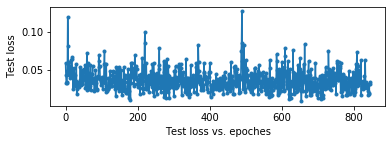

In [16]:
import matplotlib.pyplot as plt
Loss_list = []

net.train()
num_epoch = 5
for epoch in range(num_epoch):
    print('Epoch: ', epoch+1)
    for batch_idx, (data, target) in enumerate(trainloader):
        #print(data.shape,target)
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = net(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        Loss_list.append(loss / (len(dataset)))
        
        if batch_idx % 20==0:
            print('epoch %d, iter %d loss: %.3f' %(epoch+1, batch_idx+1, loss.item()))
           
            
x2 = range(0, 169*num_epoch)
y2 = Loss_list
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('Test loss vs. epoches')
plt.ylabel('Test loss')
plt.show()

# Save model

In [17]:
def save_model(model,filename):
    state = model.state_dict()
    for key in state: state[key] = state[key].clone().cpu()
    torch.save(state, filename)
save_model(net,"weight.pth")

# Load model

In [18]:
def load_model(model,filename):
    model.load_state_dict(torch.load(filename))
    return model
net = Net(num_classes=len(traindata.classes)) # initialize your network
net = load_model(net,"weight.pth")
# Whether to use GPU or not?
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
else: 
    device = 'cpu'
print("use",device,"now!")
net.to(device)

use cpu now!


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=20, bias=True)
)

# Evaluate on validation data

In [20]:
net.eval()
correct = 0
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(valloader):
        data = data.to(device)
        target = target.to(device)
        output = net(data)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()
    acc = correct.item() / len(valloader.dataset)
print("Validation Classification Accuracy: %f"%(acc))

Validation Classification Accuracy: 0.870052


# How to obtain predictions from a few images
Note. There are many ways to do the same things such as customized dataset*. The below is just a simple example how I make an inference on a few images.

* https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

In [21]:
# fetch filepaths of the testing images
testpath = os.path.join(dataset,"test01") # test set
testlist = [os.path.join(testpath,imgpath) for imgpath in os.listdir(testpath)]

In [22]:
# ImagePath => PIL_Image => Tensor
from PIL import Image
testdata = []
for imgpath in testlist:
    # In torchvision, we assume input images are all PIL types
    img = Image.open(imgpath).convert("RGB") # By default, torchvision read images in RGB-fashion
    transimg = mytransforms(img)
    testdata.append(transimg)
testdata = torch.stack(testdata)# list of tensors to tensor
testdata = torch.utils.data.TensorDataset(testdata)
# =========================================================================
# Don't shuffle the image list and set the batch_size = 1
# It's just a trick. You can still figure out another way to achieve the same thing.
testloader = torch.utils.data.DataLoader(testdata,batch_size=1,shuffle=False)

In [23]:
# Testing
net.eval()
result = {}
with torch.no_grad():
    for idx, (data,) in enumerate(testloader):
        data = data.to(device)
        target = target.to(device)
        output = net(data)
        pred_idx = output.data.max(1, keepdim=True)[1]
        pred_class = idx_to_class[pred_idx.cpu().numpy()[0][0]]
        print("predict",testlist[idx],"=>",pred_class)
        result[testlist[idx]] = pred_class

predict database\test01\0.jpg => guitar_9th_fret
predict database\test01\1.jpg => drums_Snare
predict database\test01\10.jpg => drums_Snare
predict database\test01\100.jpg => Grylloidea1
predict database\test01\1000.jpg => drums_MidTom
predict database\test01\1001.jpg => guitar_9th_fret
predict database\test01\1002.jpg => drums_Ride
predict database\test01\1003.jpg => Tettigonioidea2
predict database\test01\1004.jpg => guitar_chord2
predict database\test01\1005.jpg => Grylloidea2
predict database\test01\1006.jpg => guitar_7th_fret
predict database\test01\1007.jpg => drums_Snare
predict database\test01\1008.jpg => drums_Rim
predict database\test01\1009.jpg => guitar_7th_fret
predict database\test01\101.jpg => drums_Snare
predict database\test01\1010.jpg => Tettigonioidea1
predict database\test01\1011.jpg => drums_Ride
predict database\test01\1012.jpg => Grylloidea2
predict database\test01\1013.jpg => guitar_9th_fret
predict database\test01\1014.jpg => drums_Ride
predict database\test01\

predict database\test01\1146.jpg => drums_FloorTom
predict database\test01\1147.jpg => drums_HiHat
predict database\test01\1148.jpg => Tettigonioidea1
predict database\test01\1149.jpg => Tettigonioidea1
predict database\test01\115.jpg => drums_Snare
predict database\test01\1150.jpg => Grylloidea2
predict database\test01\1151.jpg => guitar_3rd_fret
predict database\test01\1152.jpg => drums_Rim
predict database\test01\1153.jpg => drums_MidTom
predict database\test01\1154.jpg => drums_Ride
predict database\test01\1155.jpg => Frog3
predict database\test01\1156.jpg => drums_Snare
predict database\test01\1157.jpg => guitar_3rd_fret
predict database\test01\1158.jpg => Grylloidea2
predict database\test01\1159.jpg => drums_HiHat
predict database\test01\116.jpg => Grylloidea2
predict database\test01\1160.jpg => guitar_3rd_fret
predict database\test01\1161.jpg => Grylloidea1
predict database\test01\1162.jpg => drums_Ride
predict database\test01\1163.jpg => drums_Snare
predict database\test01\1164

predict database\test01\1294.jpg => drums_Ride
predict database\test01\1295.jpg => Tettigonioidea1
predict database\test01\1296.jpg => guitar_3rd_fret
predict database\test01\1297.jpg => drums_SmallTom
predict database\test01\1298.jpg => Tettigonioidea1
predict database\test01\1299.jpg => Tettigonioidea1
predict database\test01\13.jpg => guitar_9th_fret
predict database\test01\130.jpg => drums_SmallTom
predict database\test01\1300.jpg => guitar_7th_fret
predict database\test01\1301.jpg => drums_Ride
predict database\test01\1302.jpg => drums_FloorTom
predict database\test01\1303.jpg => drums_Kick
predict database\test01\1304.jpg => drums_Kick
predict database\test01\1305.jpg => Tettigonioidea1
predict database\test01\1306.jpg => drums_Rim
predict database\test01\1307.jpg => guitar_chord1
predict database\test01\1308.jpg => drums_Snare
predict database\test01\1309.jpg => drums_HiHat
predict database\test01\131.jpg => guitar_chord2
predict database\test01\1310.jpg => drums_Snare
predict d

predict database\test01\1441.jpg => guitar_7th_fret
predict database\test01\1442.jpg => guitar_3rd_fret
predict database\test01\1443.jpg => guitar_3rd_fret
predict database\test01\1444.jpg => Grylloidea1
predict database\test01\1445.jpg => drums_Snare
predict database\test01\1446.jpg => guitar_chord1
predict database\test01\1447.jpg => drums_Ride
predict database\test01\1448.jpg => drums_Snare
predict database\test01\1449.jpg => drums_HiHat
predict database\test01\145.jpg => drums_MidTom
predict database\test01\1450.jpg => guitar_7th_fret
predict database\test01\1451.jpg => Grylloidea1
predict database\test01\1452.jpg => guitar_3rd_fret
predict database\test01\1453.jpg => Grylloidea2
predict database\test01\1454.jpg => guitar_9th_fret
predict database\test01\1455.jpg => drums_MidTom
predict database\test01\1456.jpg => guitar_9th_fret
predict database\test01\1457.jpg => drums_Kick
predict database\test01\1458.jpg => drums_SmallTom
predict database\test01\1459.jpg => drums_HiHat
predict 

predict database\test01\1590.jpg => Grylloidea1
predict database\test01\1591.jpg => guitar_9th_fret
predict database\test01\1592.jpg => drums_Ride
predict database\test01\1593.jpg => guitar_chord2
predict database\test01\1594.jpg => drums_SmallTom
predict database\test01\1595.jpg => guitar_3rd_fret
predict database\test01\1596.jpg => Grylloidea1
predict database\test01\1597.jpg => guitar_7th_fret
predict database\test01\1598.jpg => guitar_chord2
predict database\test01\1599.jpg => guitar_7th_fret
predict database\test01\16.jpg => guitar_chord1
predict database\test01\160.jpg => guitar_chord2
predict database\test01\1600.jpg => guitar_3rd_fret
predict database\test01\1601.jpg => Tettigonioidea1
predict database\test01\1602.jpg => drums_Snare
predict database\test01\1603.jpg => guitar_3rd_fret
predict database\test01\1604.jpg => drums_Ride
predict database\test01\1605.jpg => guitar_3rd_fret
predict database\test01\1606.jpg => Tettigonioidea1
predict database\test01\1607.jpg => Grylloidea

predict database\test01\1739.jpg => guitar_chord1
predict database\test01\174.jpg => Tettigonioidea2
predict database\test01\1740.jpg => guitar_3rd_fret
predict database\test01\1741.jpg => Grylloidea1
predict database\test01\1742.jpg => drums_MidTom
predict database\test01\1743.jpg => drums_Ride
predict database\test01\1744.jpg => drums_HiHat
predict database\test01\1745.jpg => Grylloidea1
predict database\test01\1746.jpg => guitar_chord2
predict database\test01\1747.jpg => Grylloidea1
predict database\test01\1748.jpg => guitar_9th_fret
predict database\test01\1749.jpg => Grylloidea1
predict database\test01\175.jpg => drums_Snare
predict database\test01\1750.jpg => guitar_9th_fret
predict database\test01\1751.jpg => drums_Snare
predict database\test01\1752.jpg => Grylloidea1
predict database\test01\1753.jpg => drums_HiHat
predict database\test01\1754.jpg => Tettigonioidea2
predict database\test01\1755.jpg => drums_Snare
predict database\test01\1756.jpg => guitar_3rd_fret
predict databa

predict database\test01\1888.jpg => Tettigonioidea1
predict database\test01\1889.jpg => guitar_9th_fret
predict database\test01\189.jpg => guitar_7th_fret
predict database\test01\1890.jpg => drums_Rim
predict database\test01\1891.jpg => drums_Snare
predict database\test01\1892.jpg => Frog3
predict database\test01\1893.jpg => guitar_9th_fret
predict database\test01\1894.jpg => guitar_9th_fret
predict database\test01\1895.jpg => drums_Kick
predict database\test01\1896.jpg => guitar_9th_fret
predict database\test01\1897.jpg => guitar_chord2
predict database\test01\1898.jpg => drums_Kick
predict database\test01\1899.jpg => Tettigonioidea2
predict database\test01\19.jpg => Tettigonioidea1
predict database\test01\190.jpg => drums_Kick
predict database\test01\1900.jpg => drums_SmallTom
predict database\test01\1901.jpg => drums_Rim
predict database\test01\1902.jpg => drums_Snare
predict database\test01\1903.jpg => Tettigonioidea1
predict database\test01\1904.jpg => drums_HiHat
predict database

predict database\test01\2034.jpg => drums_SmallTom
predict database\test01\2035.jpg => guitar_chord1
predict database\test01\2036.jpg => guitar_7th_fret
predict database\test01\2037.jpg => drums_FloorTom
predict database\test01\2038.jpg => guitar_7th_fret
predict database\test01\2039.jpg => Tettigonioidea1
predict database\test01\204.jpg => drums_Ride
predict database\test01\2040.jpg => drums_Rim
predict database\test01\2041.jpg => Grylloidea2
predict database\test01\2042.jpg => Tettigonioidea1
predict database\test01\2043.jpg => guitar_chord2
predict database\test01\2044.jpg => Grylloidea1
predict database\test01\2045.jpg => Grylloidea1
predict database\test01\2046.jpg => guitar_chord2
predict database\test01\2047.jpg => guitar_chord2
predict database\test01\2048.jpg => Grylloidea1
predict database\test01\2049.jpg => guitar_3rd_fret
predict database\test01\205.jpg => guitar_3rd_fret
predict database\test01\2050.jpg => Frog3
predict database\test01\2051.jpg => Tettigonioidea1
predict d

predict database\test01\2182.jpg => guitar_9th_fret
predict database\test01\2183.jpg => guitar_chord2
predict database\test01\2184.jpg => drums_HiHat
predict database\test01\2185.jpg => guitar_chord2
predict database\test01\2186.jpg => drums_FloorTom
predict database\test01\2187.jpg => Tettigonioidea2
predict database\test01\2188.jpg => Grylloidea1
predict database\test01\2189.jpg => drums_FloorTom
predict database\test01\219.jpg => drums_Rim
predict database\test01\2190.jpg => guitar_9th_fret
predict database\test01\2191.jpg => Grylloidea1
predict database\test01\2192.jpg => guitar_3rd_fret
predict database\test01\2193.jpg => drums_SmallTom
predict database\test01\2194.jpg => drums_Rim
predict database\test01\2195.jpg => drums_Snare
predict database\test01\2196.jpg => drums_MidTom
predict database\test01\2197.jpg => guitar_9th_fret
predict database\test01\2198.jpg => drums_MidTom
predict database\test01\2199.jpg => Grylloidea2
predict database\test01\22.jpg => drums_HiHat
predict data

predict database\test01\233.jpg => guitar_chord2
predict database\test01\2330.jpg => guitar_chord2
predict database\test01\2331.jpg => Tettigonioidea1
predict database\test01\2332.jpg => drums_Snare
predict database\test01\2333.jpg => guitar_9th_fret
predict database\test01\2334.jpg => guitar_9th_fret
predict database\test01\2335.jpg => drums_HiHat
predict database\test01\2336.jpg => guitar_chord2
predict database\test01\2337.jpg => Tettigonioidea1
predict database\test01\2338.jpg => drums_Rim
predict database\test01\2339.jpg => drums_MidTom
predict database\test01\234.jpg => guitar_9th_fret
predict database\test01\2340.jpg => guitar_9th_fret
predict database\test01\2341.jpg => drums_FloorTom
predict database\test01\2342.jpg => guitar_chord2
predict database\test01\2343.jpg => guitar_9th_fret
predict database\test01\2344.jpg => guitar_9th_fret
predict database\test01\2345.jpg => drums_Snare
predict database\test01\2346.jpg => drums_Rim
predict database\test01\2347.jpg => drums_HiHat
pr

predict database\test01\332.jpg => guitar_3rd_fret
predict database\test01\333.jpg => guitar_7th_fret
predict database\test01\334.jpg => drums_SmallTom
predict database\test01\335.jpg => guitar_chord2
predict database\test01\336.jpg => guitar_7th_fret
predict database\test01\337.jpg => drums_Kick
predict database\test01\338.jpg => guitar_3rd_fret
predict database\test01\339.jpg => Grylloidea1
predict database\test01\34.jpg => guitar_3rd_fret
predict database\test01\340.jpg => guitar_chord2
predict database\test01\341.jpg => guitar_7th_fret
predict database\test01\342.jpg => Grylloidea1
predict database\test01\343.jpg => drums_MidTom
predict database\test01\344.jpg => Grylloidea2
predict database\test01\345.jpg => guitar_3rd_fret
predict database\test01\346.jpg => guitar_3rd_fret
predict database\test01\347.jpg => drums_HiHat
predict database\test01\348.jpg => drums_Ride
predict database\test01\349.jpg => guitar_chord1
predict database\test01\35.jpg => drums_FloorTom
predict database\te

predict database\test01\484.jpg => drums_Rim
predict database\test01\485.jpg => drums_Ride
predict database\test01\486.jpg => drums_Kick
predict database\test01\487.jpg => drums_HiHat
predict database\test01\488.jpg => drums_SmallTom
predict database\test01\489.jpg => drums_FloorTom
predict database\test01\49.jpg => Tettigonioidea1
predict database\test01\490.jpg => drums_Snare
predict database\test01\491.jpg => drums_Ride
predict database\test01\492.jpg => drums_FloorTom
predict database\test01\493.jpg => guitar_chord2
predict database\test01\494.jpg => Grylloidea1
predict database\test01\495.jpg => guitar_chord2
predict database\test01\496.jpg => Grylloidea2
predict database\test01\497.jpg => guitar_3rd_fret
predict database\test01\498.jpg => Tettigonioidea1
predict database\test01\499.jpg => guitar_chord1
predict database\test01\5.jpg => guitar_7th_fret
predict database\test01\50.jpg => drums_HiHat
predict database\test01\500.jpg => Grylloidea1
predict database\test01\501.jpg => gui

predict database\test01\635.jpg => Tettigonioidea1
predict database\test01\636.jpg => guitar_9th_fret
predict database\test01\637.jpg => guitar_7th_fret
predict database\test01\638.jpg => Tettigonioidea1
predict database\test01\639.jpg => guitar_7th_fret
predict database\test01\64.jpg => guitar_chord2
predict database\test01\640.jpg => Tettigonioidea1
predict database\test01\641.jpg => drums_Ride
predict database\test01\642.jpg => drums_MidTom
predict database\test01\643.jpg => drums_Kick
predict database\test01\644.jpg => drums_Snare
predict database\test01\645.jpg => Grylloidea1
predict database\test01\646.jpg => drums_Rim
predict database\test01\647.jpg => drums_HiHat
predict database\test01\648.jpg => Tettigonioidea2
predict database\test01\649.jpg => guitar_7th_fret
predict database\test01\65.jpg => drums_SmallTom
predict database\test01\650.jpg => Grylloidea1
predict database\test01\651.jpg => guitar_chord2
predict database\test01\652.jpg => guitar_9th_fret
predict database\test0

predict database\test01\787.jpg => guitar_9th_fret
predict database\test01\788.jpg => Grylloidea1
predict database\test01\789.jpg => Grylloidea1
predict database\test01\79.jpg => guitar_chord1
predict database\test01\790.jpg => guitar_3rd_fret
predict database\test01\791.jpg => Tettigonioidea2
predict database\test01\792.jpg => guitar_7th_fret
predict database\test01\793.jpg => drums_MidTom
predict database\test01\794.jpg => drums_Kick
predict database\test01\795.jpg => drums_SmallTom
predict database\test01\796.jpg => Grylloidea2
predict database\test01\797.jpg => Tettigonioidea1
predict database\test01\798.jpg => drums_MidTom
predict database\test01\799.jpg => guitar_7th_fret
predict database\test01\8.jpg => drums_Snare
predict database\test01\80.jpg => guitar_3rd_fret
predict database\test01\800.jpg => drums_Rim
predict database\test01\801.jpg => guitar_chord1
predict database\test01\802.jpg => guitar_9th_fret
predict database\test01\803.jpg => guitar_7th_fret
predict database\test0

predict database\test01\937.jpg => guitar_9th_fret
predict database\test01\938.jpg => guitar_7th_fret
predict database\test01\939.jpg => drums_Ride
predict database\test01\94.jpg => guitar_3rd_fret
predict database\test01\940.jpg => drums_Kick
predict database\test01\941.jpg => drums_Rim
predict database\test01\942.jpg => guitar_7th_fret
predict database\test01\943.jpg => guitar_3rd_fret
predict database\test01\944.jpg => Tettigonioidea1
predict database\test01\945.jpg => drums_Kick
predict database\test01\946.jpg => Tettigonioidea1
predict database\test01\947.jpg => Grylloidea1
predict database\test01\948.jpg => Tettigonioidea2
predict database\test01\949.jpg => drums_Snare
predict database\test01\95.jpg => drums_Snare
predict database\test01\950.jpg => Grylloidea1
predict database\test01\951.jpg => drums_Rim
predict database\test01\952.jpg => guitar_7th_fret
predict database\test01\953.jpg => Tettigonioidea2
predict database\test01\954.jpg => drums_Kick
predict database\test01\955.jp

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
#Testing(adding 20191219)
import torch

classes2label = {
"Tettigonioidea1":0,
"Tettigonioidea2":1,
"drums_Snare":2,
"Grylloidea1":3,
"drums_MidTom":4,
"drums_HiHat":5,
"drums_Kick":6,
"drums_SmallTom":7,
"guitar_chord2":8,
"Frog1":9,
"Frog2":10,
"drums_FloorTom":11,
"guitar_7th_fret":12,
"drums_Rim":13,
"Grylloidea2":14,
"guitar_3rd_fret":15,
"drums_Ride":16,
"guitar_chord1":17,
"guitar_9th_fret":18,
"Frog3":19
}

out = open('database/result01.csv', "w")
out.write("id,category\n")

for i in range(2387):
    I = str(i)
    testlist_idx = "database\\test01\\%s.jpg" %(I)
    x = classes2label[result[testlist_idx]]
    out.write(I+","+str(x))
    if i is not 2387:
        out.write("\n")

out.close()